In [1]:
import numpy as np
from scipy.stats.mstats import gmean
import matplotlib.pyplot as plt

np.random.seed(1123)

## Saint Petersburg Wager

In [52]:
# Monte Carlo Simulation
dice_payoff = [1, 2, 6, 22, 200, 1_000_000]
dice_probs = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
n_trials = 10_000_000
n_rolls = 1
mc = np.random.choice(dice_payoff, (n_trials, n_rolls), p=dice_probs)

In [53]:
arithmetic_mean = np.mean(mc, axis=1)
arithmetic_center  = np.mean(arithmetic_mean)
print(f"Arithmetic expected value: ${arithmetic_center:.0f}")

geometric_mean = gmean(mc, axis=1)
geom_center  = gmean(geometric_mean)
print(f"Geometric expected value: ${geom_center:.0f}")


Arithmetic expected value: $166760
Geometric expected value: $61


## Bernoullian Expected Value

In [54]:
#BEV of ending wealth; starting wealth = 100_000
bev = np.exp((np.log(50_001) + np.log(50_002) + np.log(50_006) + np.log(50_022) + np.log(50_200) + np.log(1_050_000))/6)

# Note: since ending wealth is lower that starting wealth, it's not a good bet
print(f"BEV: {bev}")

BEV: 83113.90899349027


In [55]:
geometric_mean = (50_001 * 50_002 * 50_006 * 50_022 * 50_200 * 1_050_000)**(1/6)
scipy_gmean = gmean([50_001, 50_002, 50_006, 50_022, 50_200, 1_050_000])
print(f"Geometric average: {geometric_mean}, checksum: {geometric_mean == scipy_gmean}")

Geometric average: 83113.90899349027, checksum: True


## Fractional Expected Value

Fraction wagered: 1.0, arithmetic mean: $166705, geometric mean: $61
Fraction wagered: 0.9, arithmetic mean: $176705, geometric mean: $21663
Fraction wagered: 0.8, arithmetic mean: $186705, geometric mean: $38588
Fraction wagered: 0.7, arithmetic mean: $196705, geometric mean: $54154
Fraction wagered: 0.6, arithmetic mean: $206705, geometric mean: $68914
Fraction wagered: 0.5, arithmetic mean: $216705, geometric mean: $83114
Fraction wagered: 0.4, arithmetic mean: $226705, geometric mean: $96892
Fraction wagered: 0.3, arithmetic mean: $236705, geometric mean: $110336
Fraction wagered: 0.2, arithmetic mean: $246705, geometric mean: $123506
Fraction wagered: 0.1, arithmetic mean: $256705, geometric mean: $136445
Fraction wagered: 0.0, arithmetic mean: $266705, geometric mean: $149188


[]

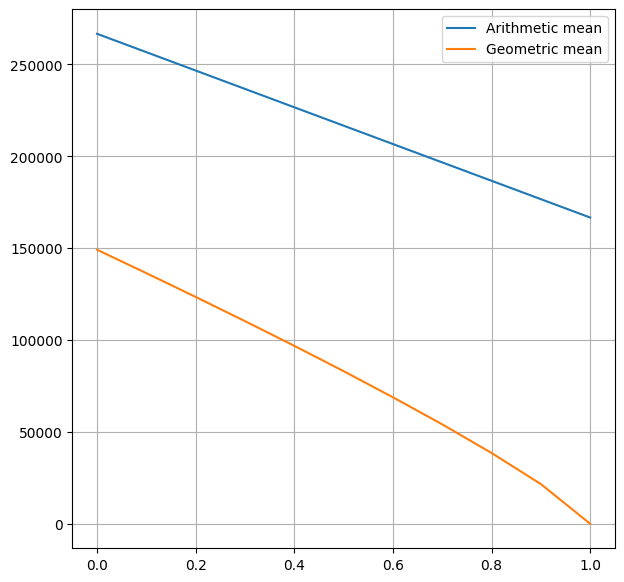

In [51]:
starting_wealth = 100_000
fraction_wagered, arithmetic_mean, geometric_mean = [], [], []

for fraction in np.arange(1, -0.1, -0.1):
    wager =  starting_wealth-((fraction) * starting_wealth)
    ending_wealth =  np.array(dice_payoff) + wager
    fraction_wagered.append(fraction)
    arithmetic_mean.append(np.mean(ending_wealth))
    geometric_mean.append(gmean(ending_wealth))
    print(f"Fraction wagered: {fraction:.1f}, arithmetic mean: ${np.mean(ending_wealth):.0f}, geometric mean: ${gmean(ending_wealth):.0f}")

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(fraction_wagered, arithmetic_mean, label="Arithmetic mean")
ax.plot(fraction_wagered, geometric_mean, label="Geometric mean")
ax.legend()
ax.grid(True)
ax.plot()